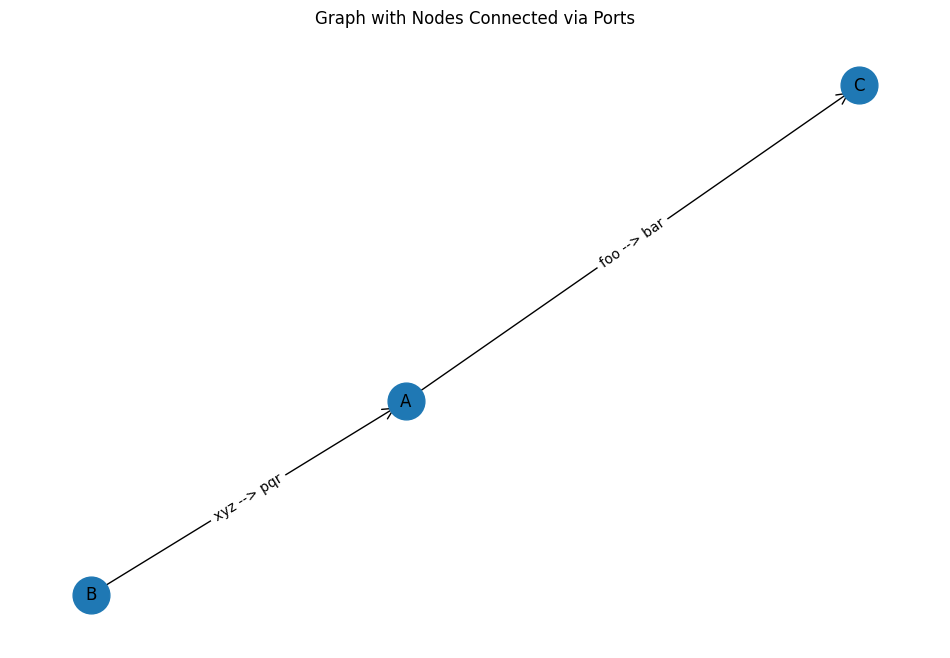

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

def get_edge_labels_from_ports(graph):
    edge_labels = {}
    for u, v, a in graph.edges(data=True):
        edge_labels[(u, v)] = f"{a['source_port']} --> {a['destination_port']}"
    return edge_labels

    

# Create a directed graph
G = nx.DiGraph()

# Add nodes with attributes
G.add_node("A", type="Component", size="Large")
G.add_node("B", type="Component", size="Medium")
G.add_node("C", type="Component", size="Small")

# Add edges with structured attributes
G.add_edge("A", "C", source_port="foo", destination_port="bar",)
G.add_edge("B", "A", source_port="xyz", destination_port="pqr",)


# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=12)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)

# Draw edge labels with port information
edge_labels = get_edge_labels_from_ports(G)

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show final plot
plt.title('Graph with Nodes Connected via Ports')
plt.axis('off')  # Turn off the axis
plt.show()


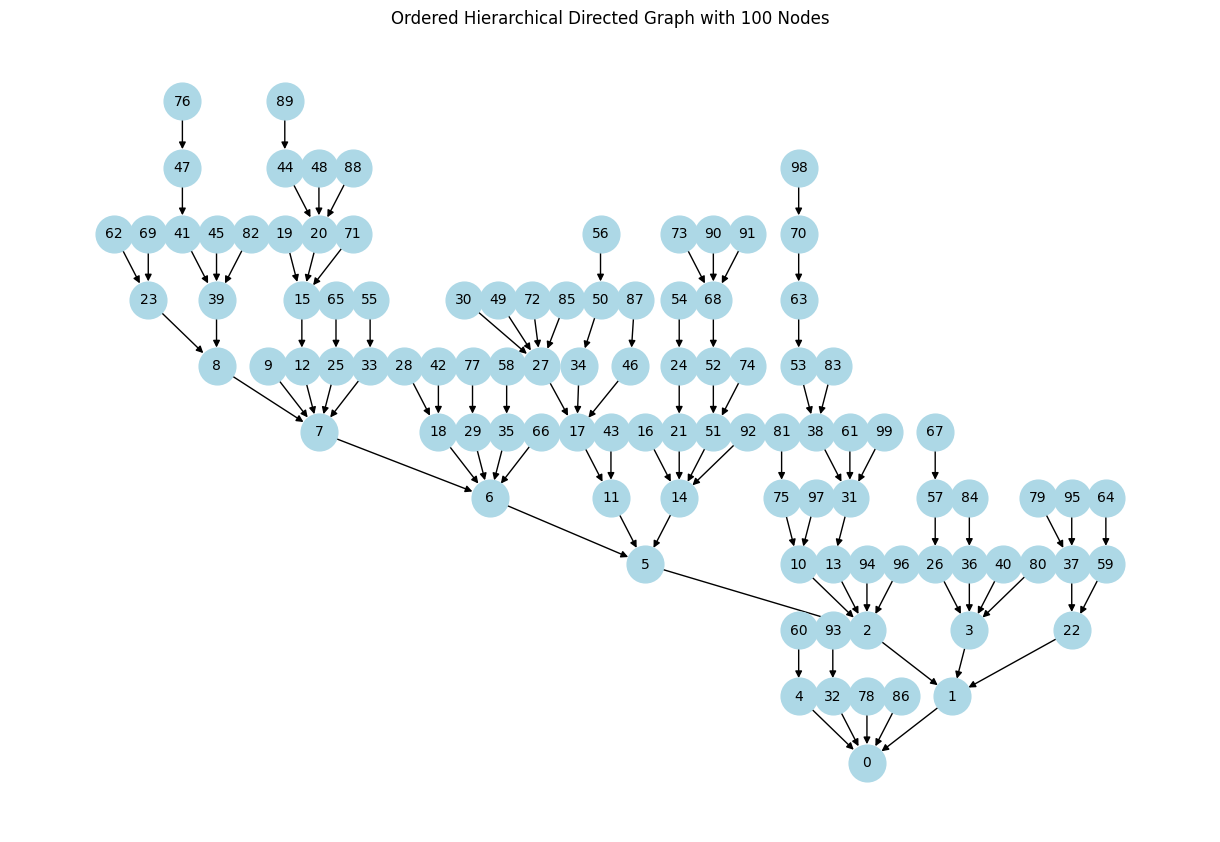

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Number of nodes
num_nodes = 100

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for i in range(num_nodes):
    G.add_node(i)

# Adding edges - creating a hierarchy
for i in range(1, num_nodes):
    G.add_edge(i, random.randint(0, i - 1))

# Draw the graph with a tree layout
plt.figure(figsize=(12, 8))

# Using a hierarchical layout
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, arrows=True)
plt.title('Ordered Hierarchical Directed Graph with 100 Nodes')
plt.show()


This looks fine, but isn't useful for Machine Learning...

To use this graph as input for anomaly detection with scikit-learn, we'll need to convert the graph data into a format that's suitable for machine learning algorithms. Most scikit-learn algorithms work with tabular data, so we'll transform the graph data into a feature matrix (and possibly a target vector, depending on the algorithm).

In [5]:
import networkx as nx
import numpy as np
from sklearn.ensemble import IsolationForest

# Feature Extraction: Use node degree as a feature
node_degrees = np.array([degree for node, degree in G.degree()]).reshape(-1, 1)

# Anomaly Detection using Isolation Forest
clf = IsolationForest(random_state=42)  # use the same random_state for reproducible outputs
clf.fit(node_degrees)

IsolationForest(random_state=42)

In [12]:
node_degrees, min(node_degrees), max(node_degrees)

(array([[8],
        [4],
        [5],
        [5],
        [3],
        [5],
        [2],
        [3],
        [2],
        [1],
        [2],
        [1],
        [5],
        [3],
        [5],
        [1],
        [2],
        [2],
        [4],
        [6],
        [4],
        [3],
        [2],
        [2],
        [4],
        [1],
        [3],
        [1],
        [2],
        [2],
        [3],
        [2],
        [2],
        [3],
        [3],
        [2],
        [1],
        [2],
        [1],
        [1],
        [1],
        [3],
        [1],
        [2],
        [1],
        [3],
        [3],
        [2],
        [1],
        [2],
        [1],
        [3],
        [2],
        [2],
        [1],
        [2],
        [1],
        [1],
        [1],
        [1],
        [1],
        [3],
        [1],
        [2],
        [1],
        [1],
        [3],
        [1],
        [2],
        [1],
        [1],
        [1],
        [2],
        [2],
        [1],
        [2],
        [2],

In [6]:
# Predict if a node is an anomaly
def predict_new_node_anomaly(graph, model, new_node_degree):
    # Feature for the new node
    new_node_feature = np.array([[new_node_degree]])
    
    # Predict using the trained model
    prediction = model.predict(new_node_feature)
    
    # Determine if it's an anomaly (-1 indicates an anomaly)
    is_anomaly = prediction[0] == -1
    return is_anomaly

print(predict_new_node_anomaly(G, clf, -1))
print(predict_new_node_anomaly(G, clf, 0))
print(predict_new_node_anomaly(G, clf, 1))
print(predict_new_node_anomaly(G, clf, 8))
print(predict_new_node_anomaly(G, clf, 9))
print(predict_new_node_anomaly(G, clf, 10))
print(predict_new_node_anomaly(G, clf, 100))

False
False
False
True
True
True
True


`-1` and `0` are not reported as anomalies, because there are many nodes with a degree of `1`. And because the numerical distance from `0` to `1` is relatively short `0` isn't easily isolated. Thus the model doesn't treat `0` as a anomaly even tough there isn't a single node with a degree of `0`...

# Random Graph with ports

In [76]:
import networkx as nx
import matplotlib.pyplot as plt
import random

PORT_NAMES = [
    "HTTPListener",
    "DatabaseConnector",
    "AuthService",
    "UserInput",
    "DataOutput",
    "CacheInterface",
    "MessageQueue",
    "ExternalAPI",
    "NotificationSender",
    "LoggingEndpoint"
]


# Number of nodes
num_nodes = 100

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for i in range(num_nodes):
    G.add_node(i)

# Adding edges - creating a hierarchy
for i in range(1, num_nodes):
    port_name = random.choice(PORT_NAMES)
    G.add_edge(i, random.randint(0, i - 1), source_port=port_name, destination_port=port_name)

# Edge edge names
edge_labels = get_edge_labels_from_ports(G)

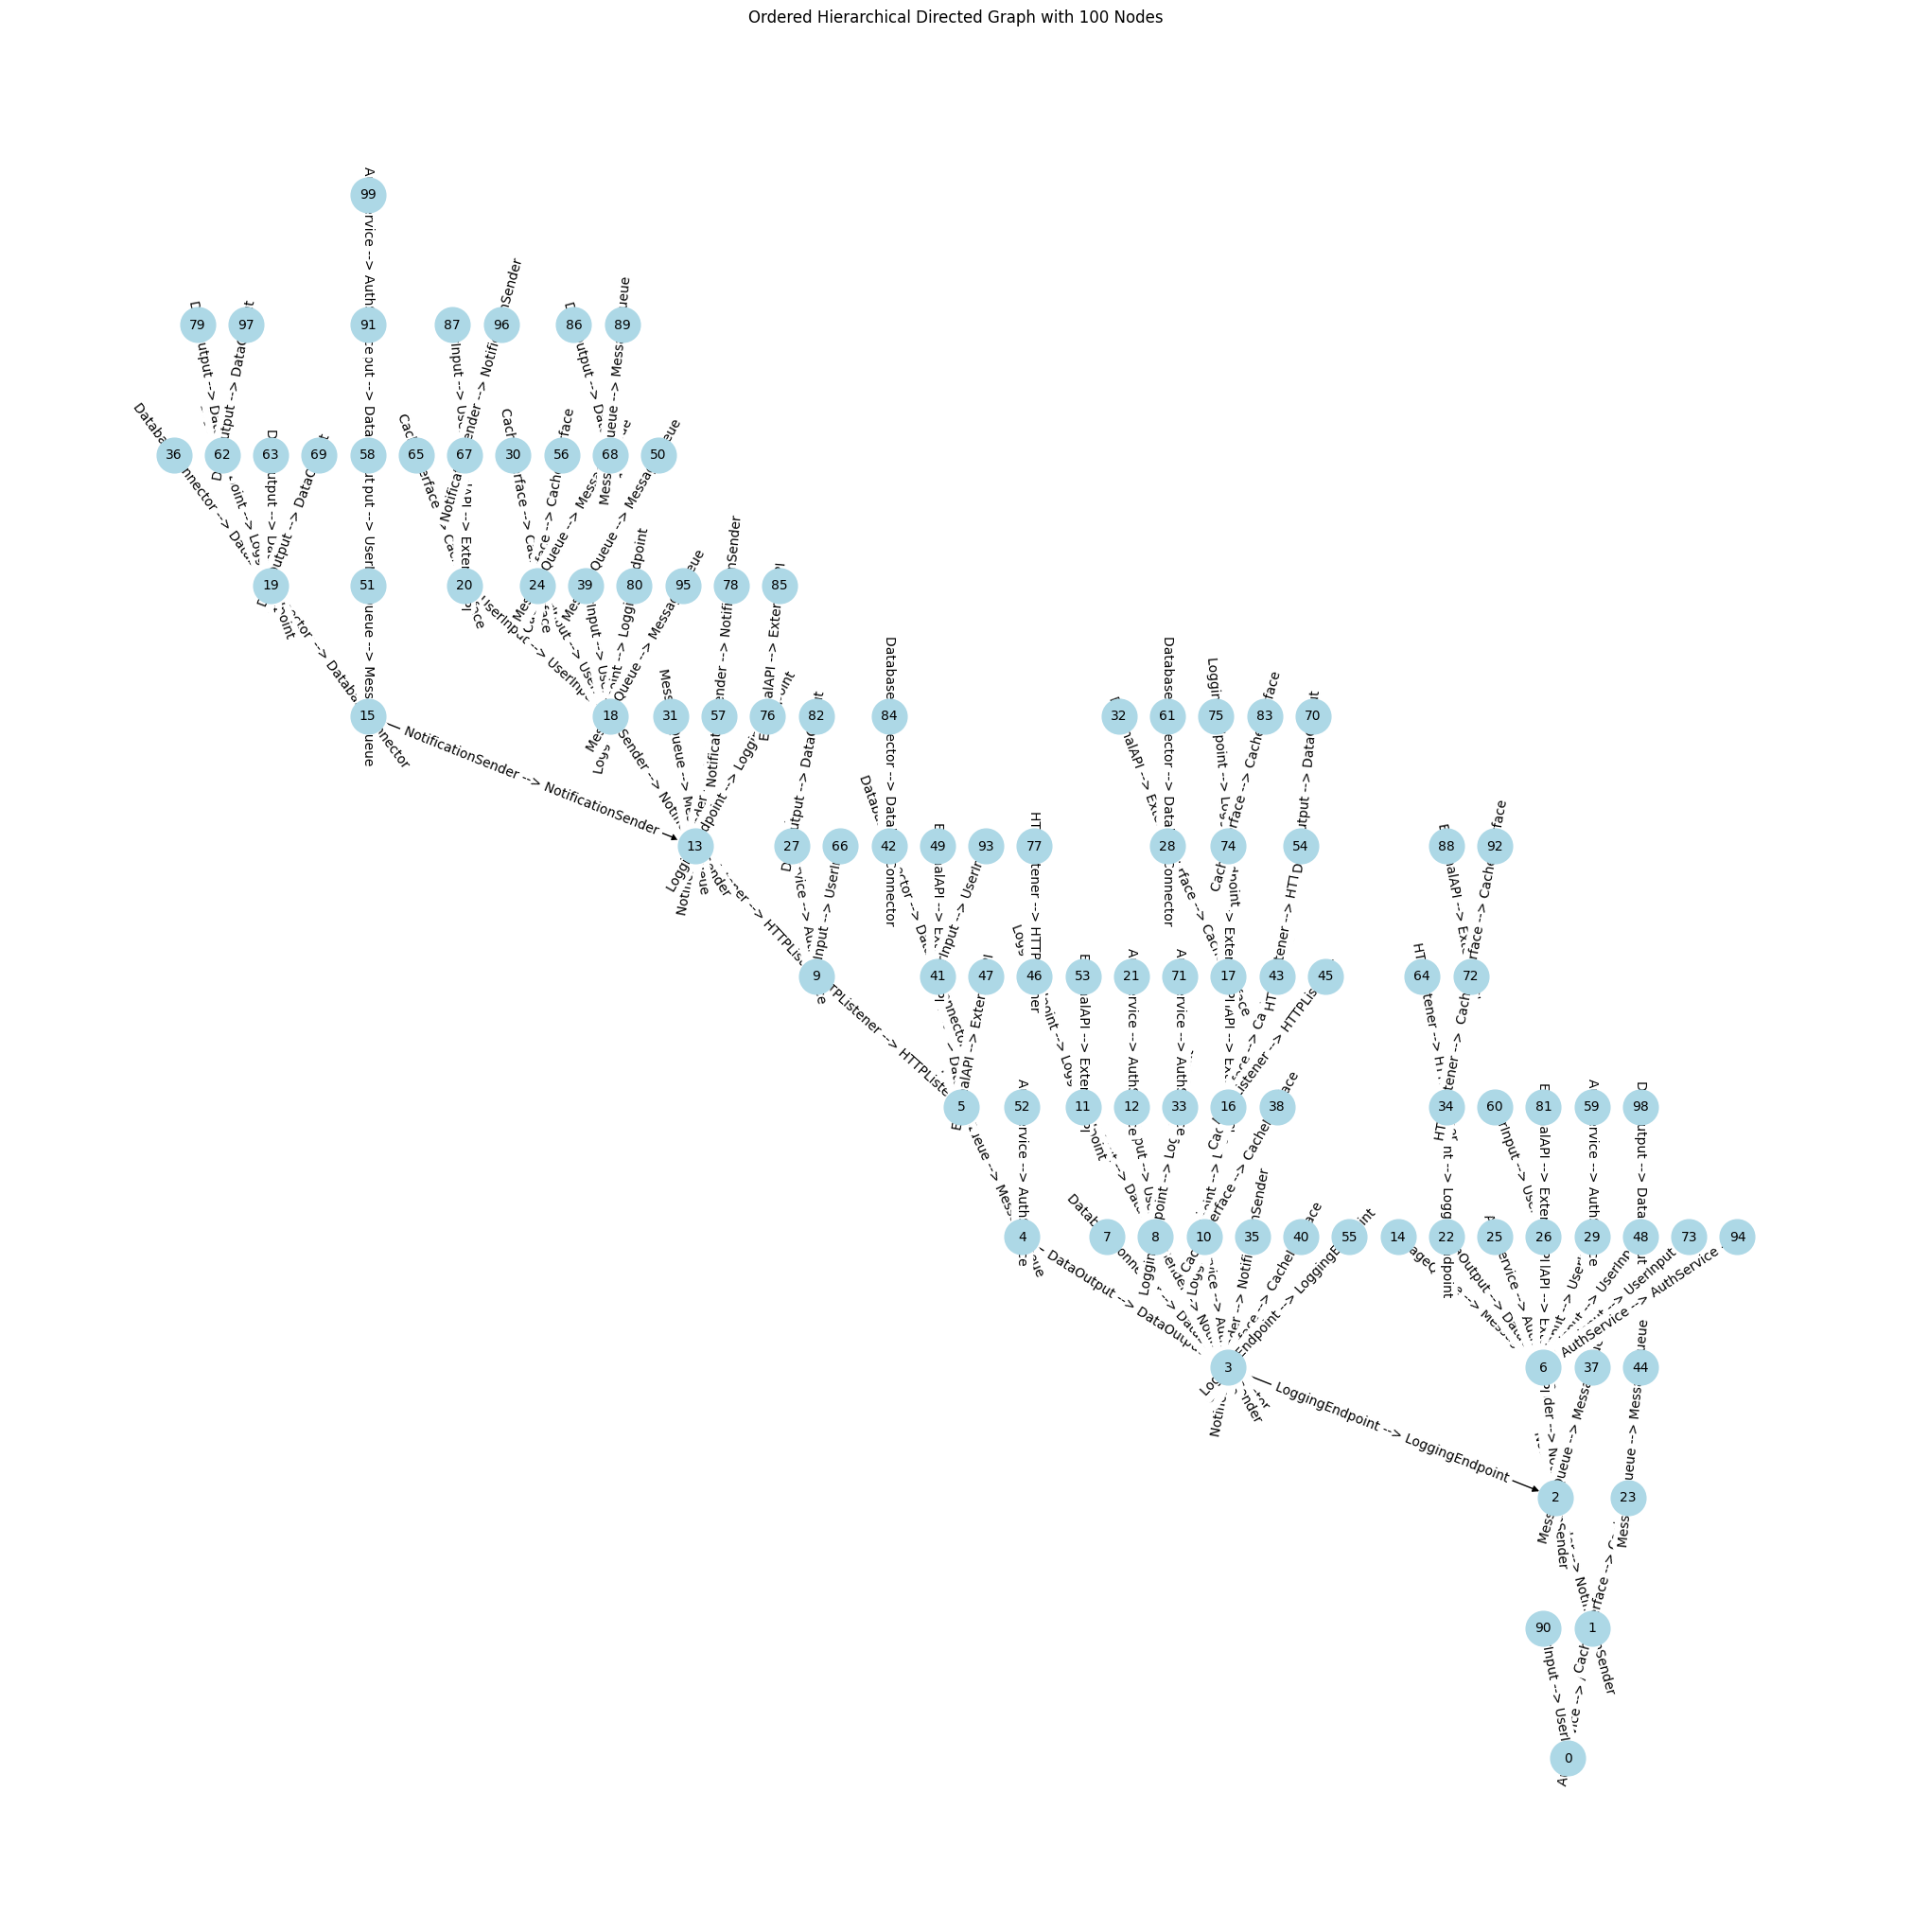

In [77]:
# Draw the graph with a tree layout
plt.figure(figsize=(20, 20))

pos = nx.nx_agraph.graphviz_layout(G, prog='dot') # ,args="-Grankdir=LR"
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Ordered Hierarchical Directed Graph with 100 Nodes')
plt.show()

In [106]:

anomalies = [-1 for _ in range(num_nodes)]

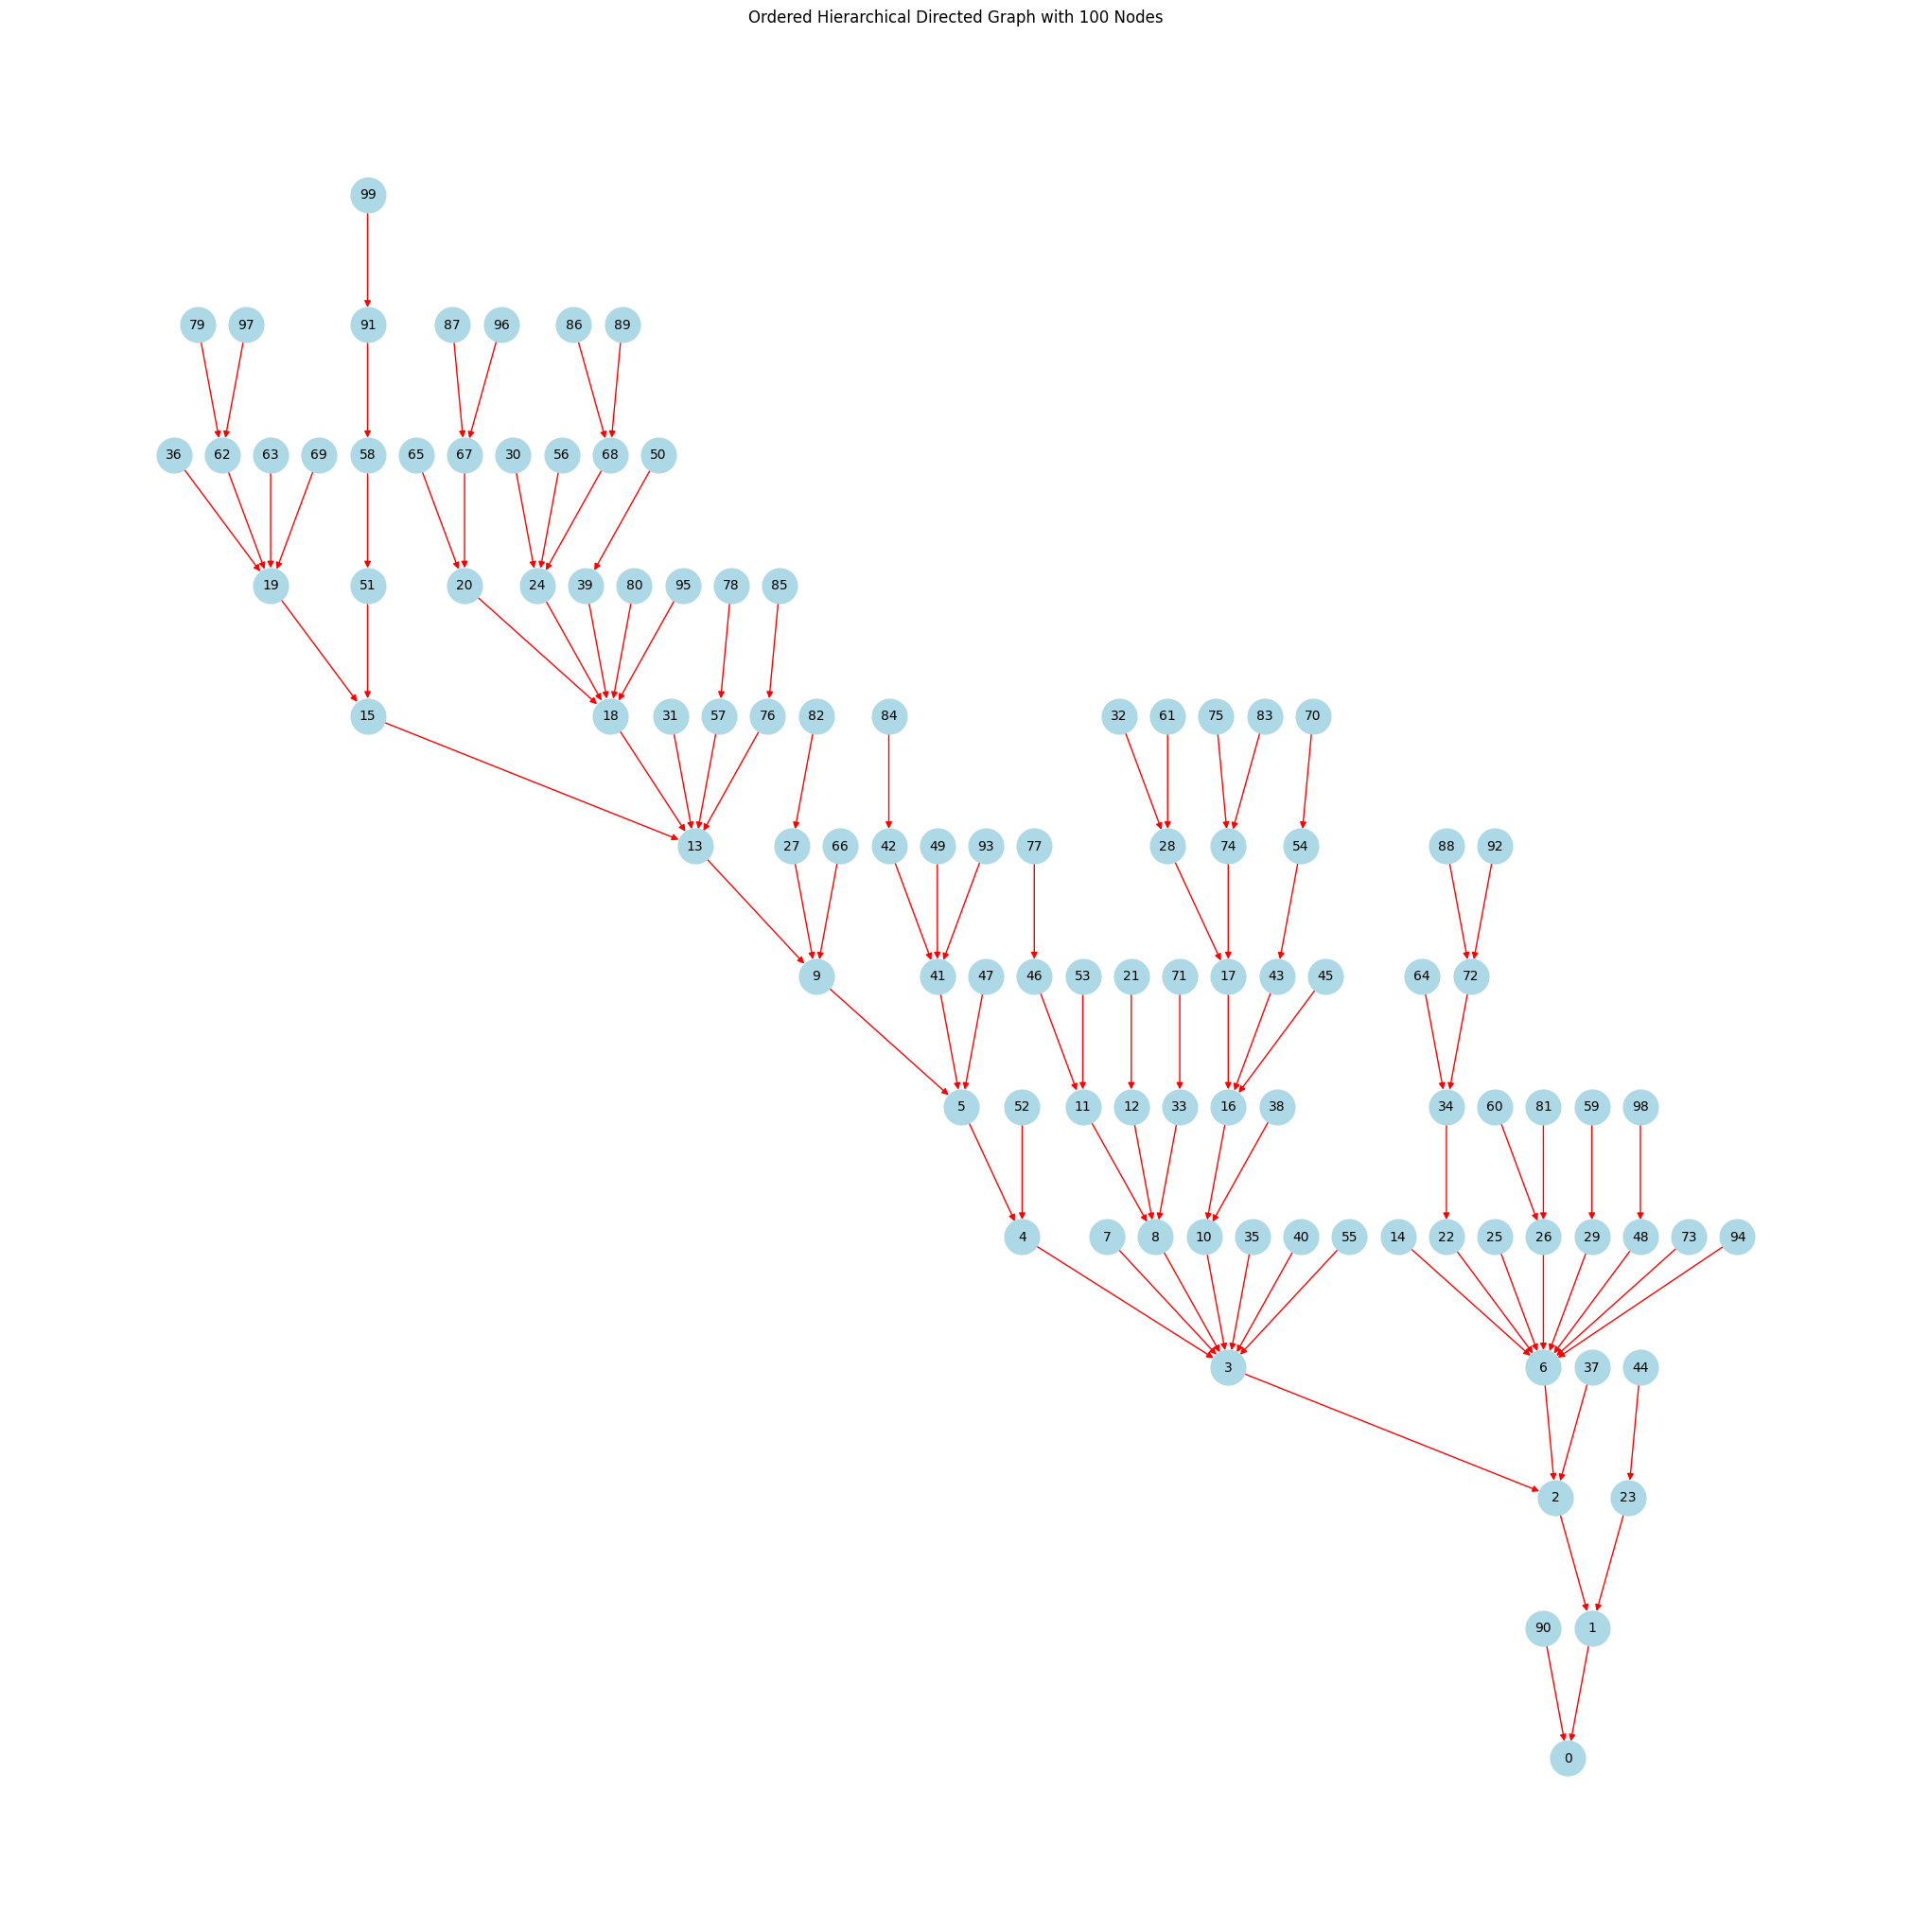

In [85]:
# Mark all edges with anomalies as red
edge_color = ['red' if a == -1 else 'blue' for a in anomalies]

# Set edge attributes for colors
plt.figure(figsize=(20, 20))

pos = nx.nx_agraph.graphviz_layout(G, prog='dot') # ,args="-Grankdir=LR"
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", edge_color=edge_color, font_size=10, arrows=True)

# nx.draw_networkx_edge_labels(G, pos)
plt.title('Ordered Hierarchical Directed Graph with 100 Nodes')
plt.show()